<a href="https://colab.research.google.com/github/Brandon-Bernal-Alarcon/Notas--R/blob/main/ggplot2/Visualizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librerías**

In [1]:
install.packages("ggplot2")
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
#Datos a gráficar
set.seed(123)
datos <- tibble(
  id = 1:100,
  edad = sample(18:65, 100, replace = TRUE),
  sexo = sample(c("Hombre", "Mujer"), 100, replace = TRUE),
  ciudad = sample(c("CDMX", "Guadalajara", "Monterrey", "Puebla"), 100, replace = TRUE),
  ingreso_mensual = round(rnorm(100, mean = 15000, sd = 4000), 0),
  nivel_educativo = sample(c("Secundaria", "Preparatoria", "Universidad", "Posgrado"), 100, replace = TRUE)
)

**Estructura** básica de los gráficos en ggplot2

ggplot(data, aes(x = , y = , color = , size = )) +
  tipo_de_grafico() +
    complementos
    
\

**Aesthetic aes()**

Son los elementos visuales que se asignan dentro de aes():

x → eje horizontal

y → eje vertical

color → color del punto o línea

size → tamaño del punto

shape → forma de los puntos

fill → color interno (para barras, cajas, etc.)


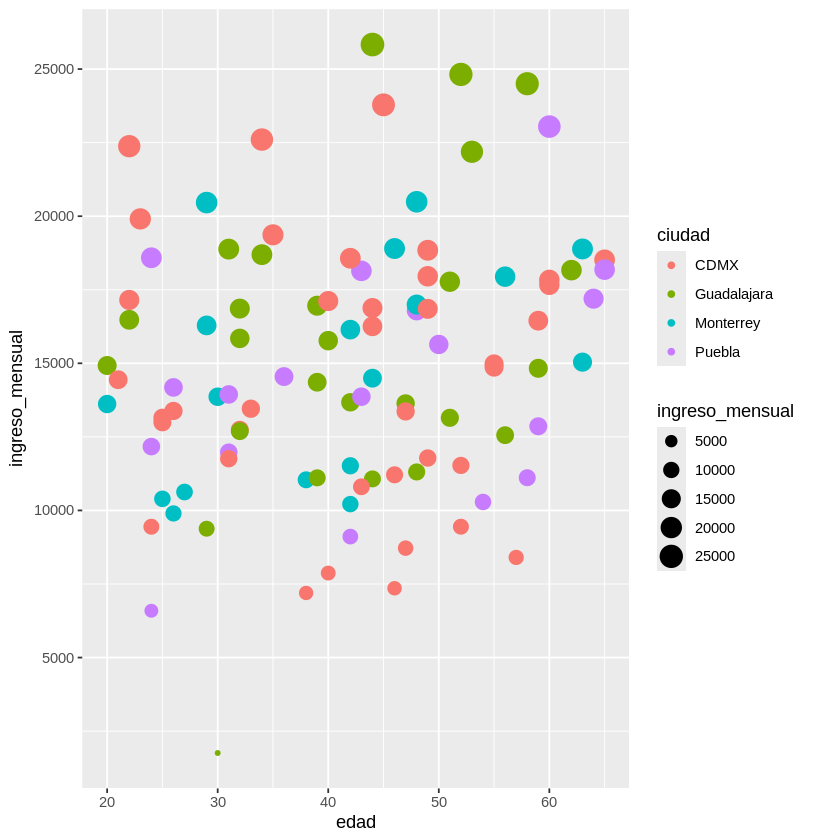

In [4]:
ggplot(datos, aes(x = edad, y = ingreso_mensual, color = ciudad, size = ingreso_mensual)) +
  geom_point()

**Complementos útiles**

scale_x_log10() / scale_y_log10() → escala logarítmica para mejorar visualización.

geom_smooth(method = "lm") → agrega línea de regresión (lineal u otra).
(method = "lm" → usa regresión lineal, se = TRUE = muestra intervalo de confianza, color = color de la línea, fill = color del intervalo, linetype = tipo de línea)

theme_classic() → cambia el estilo del gráfico.

facet_wrap(~variable) → divide gráficos según categorías.

ggtitle() y labs() → títulos y etiquetas personalizadas.

xlim() y ylim() → límites del eje x o y.

**Argumentos útiles:**

Se usan en geom_...()

color → color del borde del punto

fill → color interno

size → tamaño del punto

shape → forma del punto (0 a 25)

alpha → opacidad (0=transparente, 1=opaco)

linetype → tipo de línea ("solid", "dashed", "dotted", etc.)

width → ancho de las barras (grafico de barras)

binwidth → ancho de cada barra (en Histograma)

bins → número de divisiones automáticas (En histogram)

Gráfico de dispersión – **geom_point()**

Uso: visualiza la relación entre dos variables numéricas.

**Argumentos útiles:**

geom_point(color = "red", size = 3, shape = 16, alpha = 0.5)

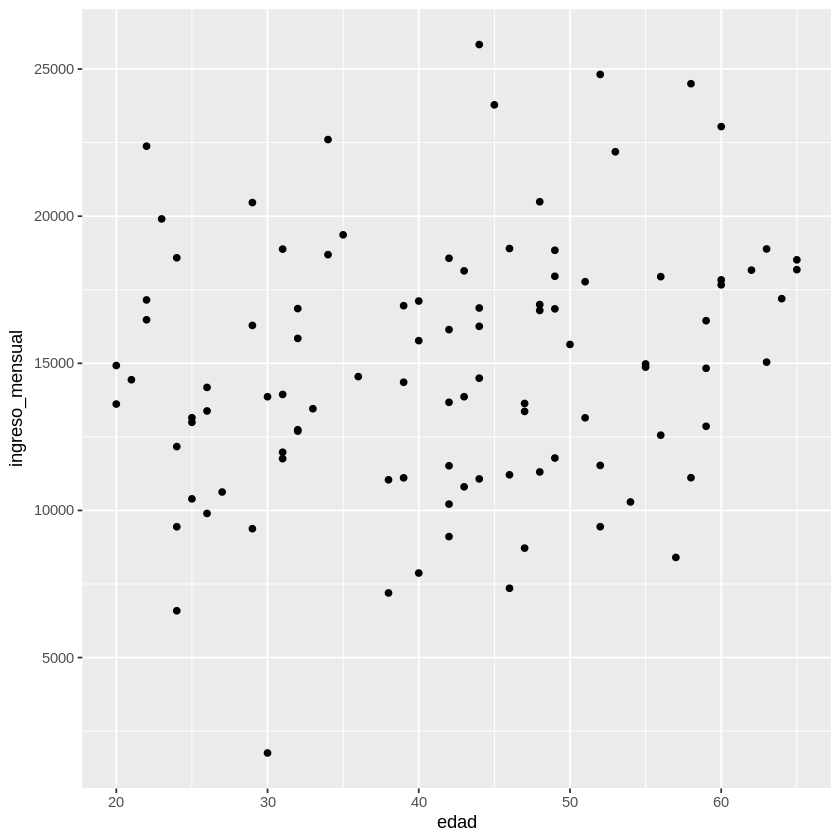

In [10]:
# Ejemplo basico
ggplot(datos, aes(x = edad,  y = ingreso_mensual)) + geom_point()

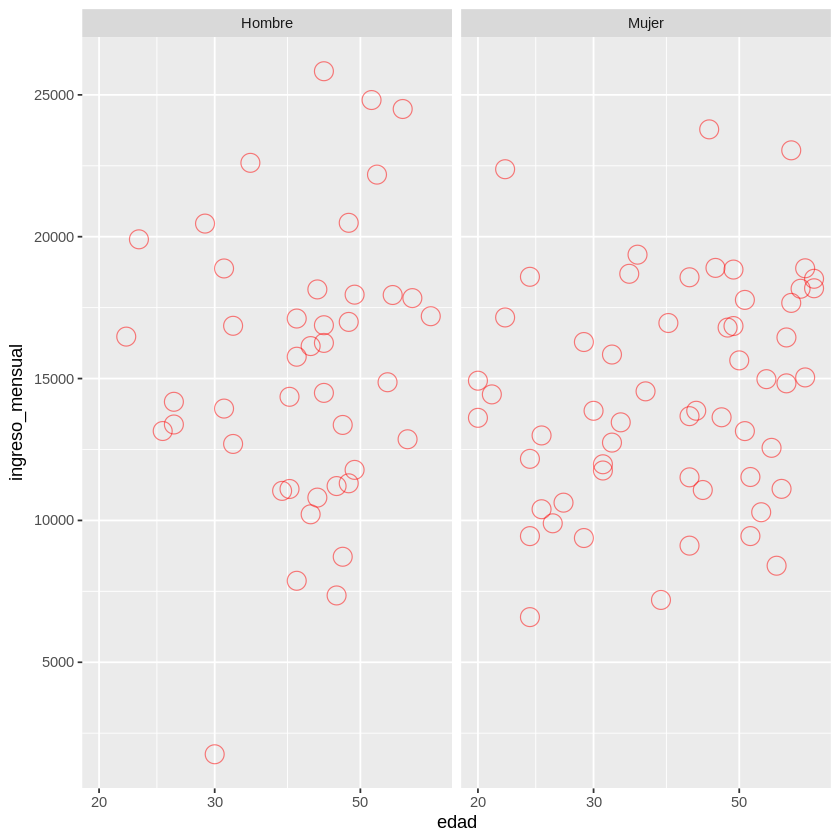

In [27]:
# Ejemplo usando aes
ggplot(datos, aes(x = edad, y = ingreso_mensual, color = ciudad, size = ingreso_mensual)) +
  geom_point(color = "red", size = 5, shape = 1, alpha = 0.5) +
  #geom_point() +
    scale_x_log10() +
    facet_wrap(~sexo)

Gráfico de líneas – **geom_line()**

Uso: muestra tendencias a lo largo del tiempo.

geom_line(color = "blue", size = 1, linetype = "dashed", alpha = 0.8)

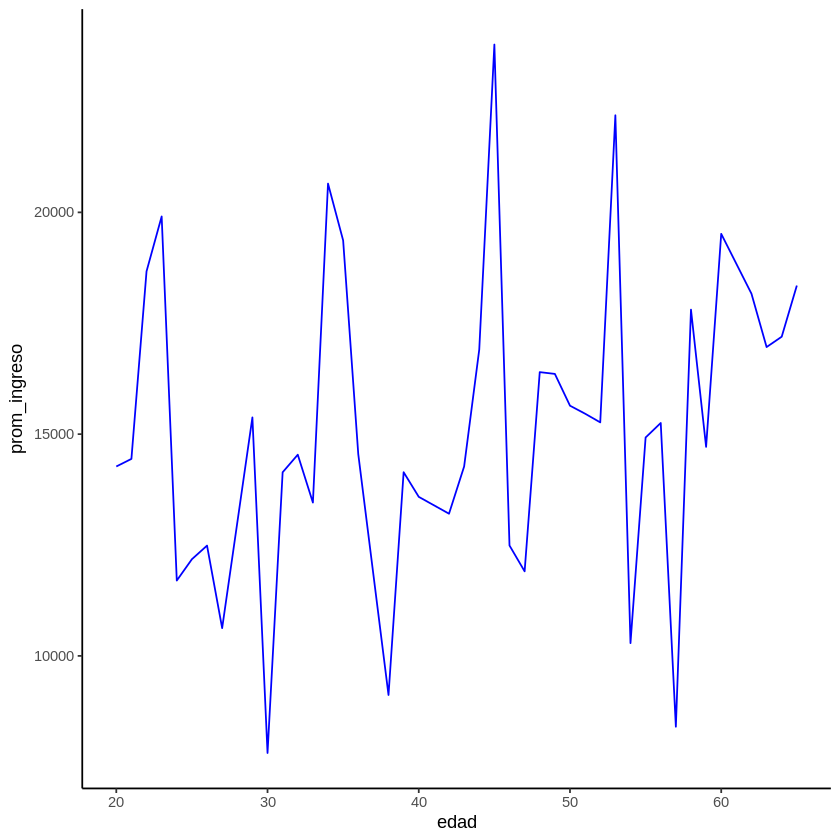

In [17]:
# Promedio de ingreso mensual por edad
por_edad <- datos %>%
  group_by(edad) %>%
  summarize(prom_ingreso = mean(ingreso_mensual))

ggplot(por_edad, aes(x = edad, y = prom_ingreso)) +
  geom_line(color = "blue") +
  theme_classic()

**Gráfico de barras – geom_col()**

Uso: comparar valores agregados por categoría.

geom_col(fill = "steelblue", color = "black", width = 0.7)

geom_bar(fill = "orange", color = "black", width = 0.6)

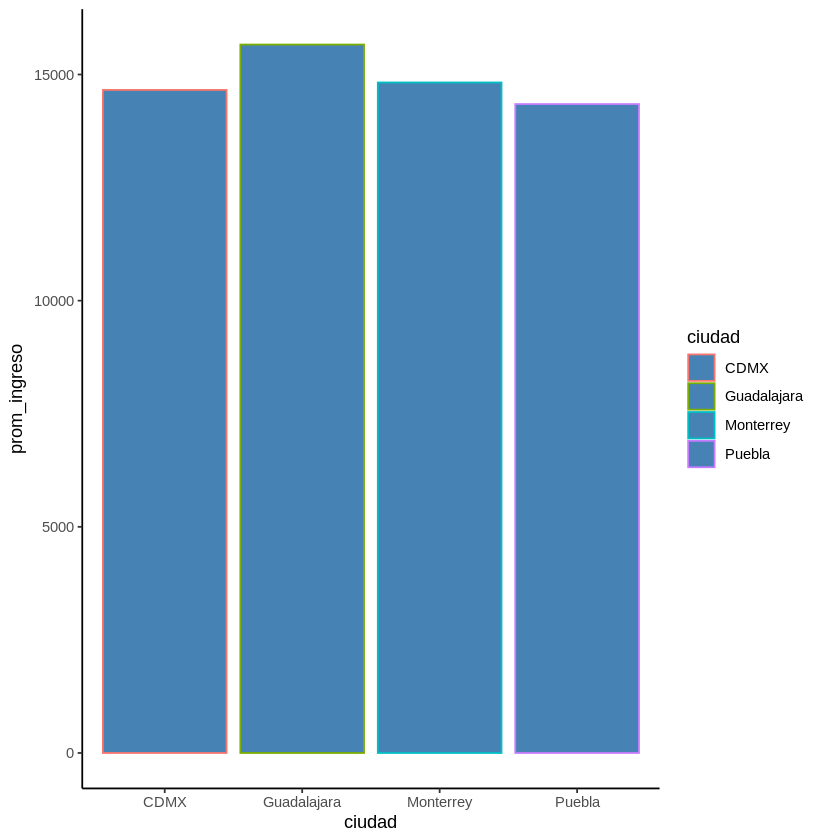

In [21]:
# Ingreso promedio por ciudad
por_ciudad <- datos %>%
  group_by(ciudad) %>%
  summarize(prom_ingreso = mean(ingreso_mensual))

ggplot(por_ciudad, aes(x = ciudad, y = prom_ingreso, color = ciudad)) +
  geom_col(fill = "steelblue") +
  theme_classic()

Histograma – geom_histogram()

geom_histogram(binwidth = 500, fill = "purple", color = "white", alpha = 0.7)

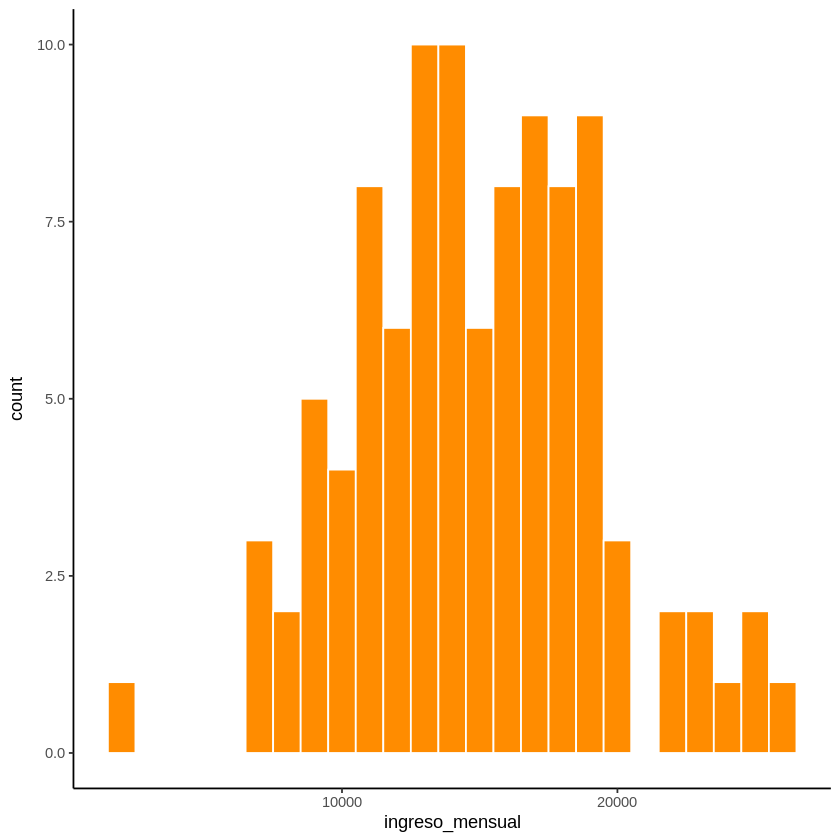

In [22]:
ggplot(datos, aes(x = ingreso_mensual)) +
  geom_histogram(binwidth = 1000, fill = "darkorange", color = "white") +
  theme_classic()


**Diagrama de cajas – geom_boxplot()**

Uso: comparar distribuciones entre grupos.

geom_boxplot(fill = "lightgreen", color = "darkgreen", outlier.shape = 8, width = 0.5)

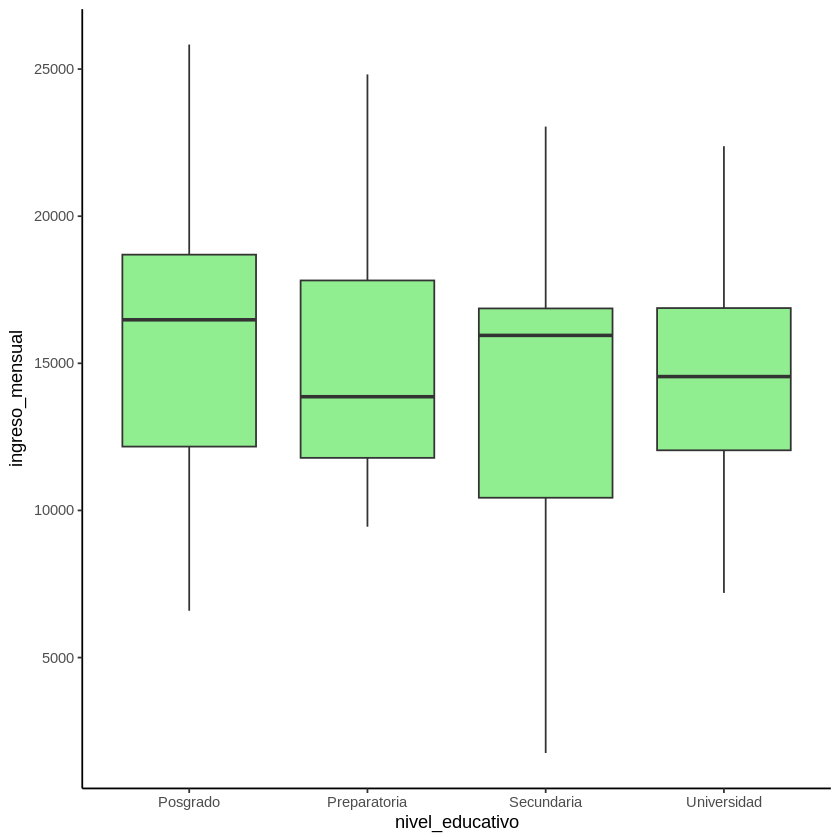

In [23]:
ggplot(datos, aes(x = nivel_educativo, y = ingreso_mensual)) +
  geom_boxplot(fill = "lightgreen") +
  theme_classic()

**Títulos y etiquetas personalizadas**

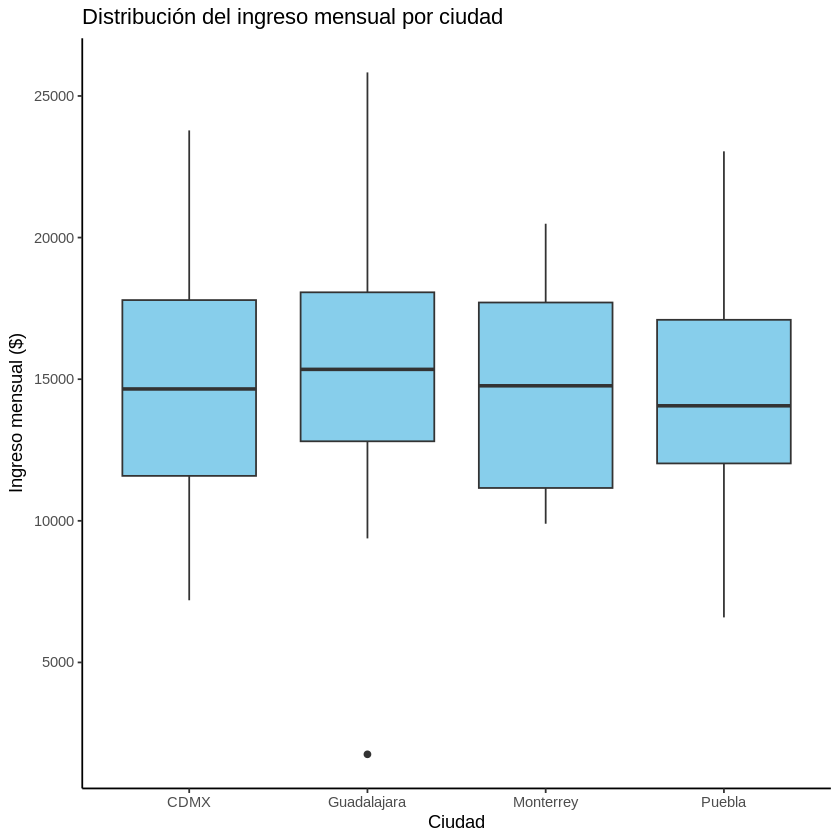

In [24]:
ggplot(datos, aes(x = ciudad, y = ingreso_mensual)) +
  geom_boxplot(fill = "skyblue") +
  ggtitle("Distribución del ingreso mensual por ciudad") +
  labs(x = "Ciudad", y = "Ingreso mensual ($)") +
  theme_classic()

Smooth

geom_smooth(method = "lm", se = TRUE, color = "red", fill = "pink", linetype = "dashed")

`geom_smooth()` using formula = 'y ~ x'


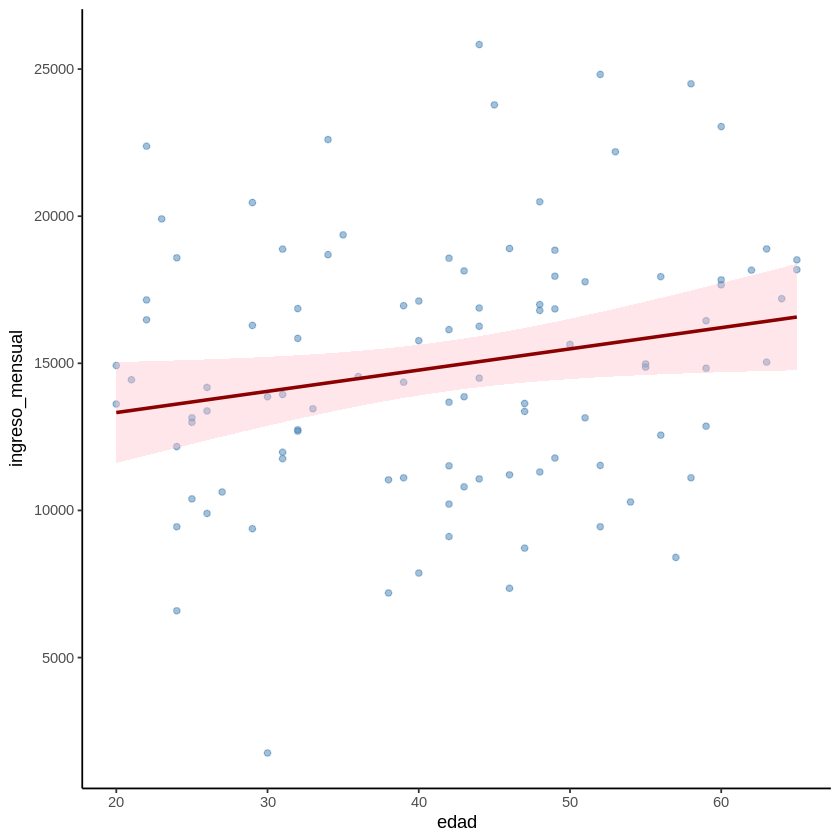

In [29]:
ggplot(datos, aes(x = edad, y = ingreso_mensual)) +
  geom_point(alpha = 0.5, color = "steelblue") +
  geom_smooth(method = "lm", se = TRUE, color = "darkred", fill = "pink") +
  theme_classic()

**labs() — Etiquetas personalizadas**

Agrega títulos y etiquetas a los ejes:

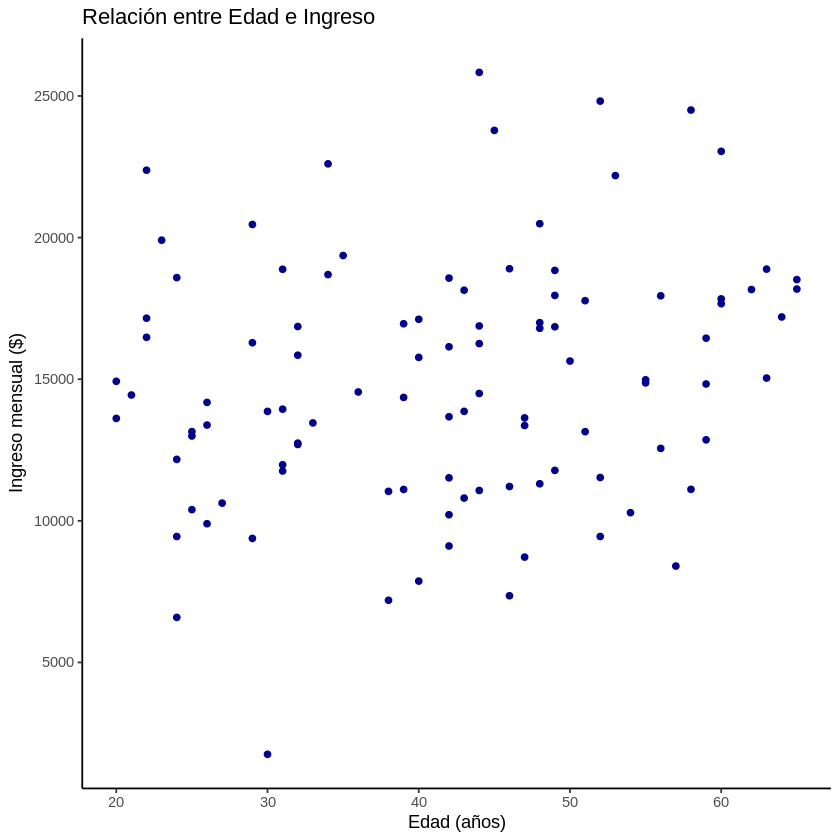

In [30]:
ggplot(datos, aes(x = edad, y = ingreso_mensual)) +
  geom_point(color = "darkblue") +
  labs(
    title = "Relación entre Edad e Ingreso",
    x = "Edad (años)",
    y = "Ingreso mensual ($)"
  ) +
  theme_classic()

**ggsave() — Guardar el gráfico como imagen**

Guarda el gráfico generado en un archivo, Cambia el nombre, formato (.png, .pdf, etc.), tamaño y resolución (dpi = 300).

In [31]:
ggsave("grafico_ingreso_edad.png", width = 10, height = 5)

**geom_vline() y geom_hline() — Líneas verticales u horizontales**

Añade líneas de referencia en ejes x o y. Ejemplo: línea vertical a los 40 años de edad (x = 40)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


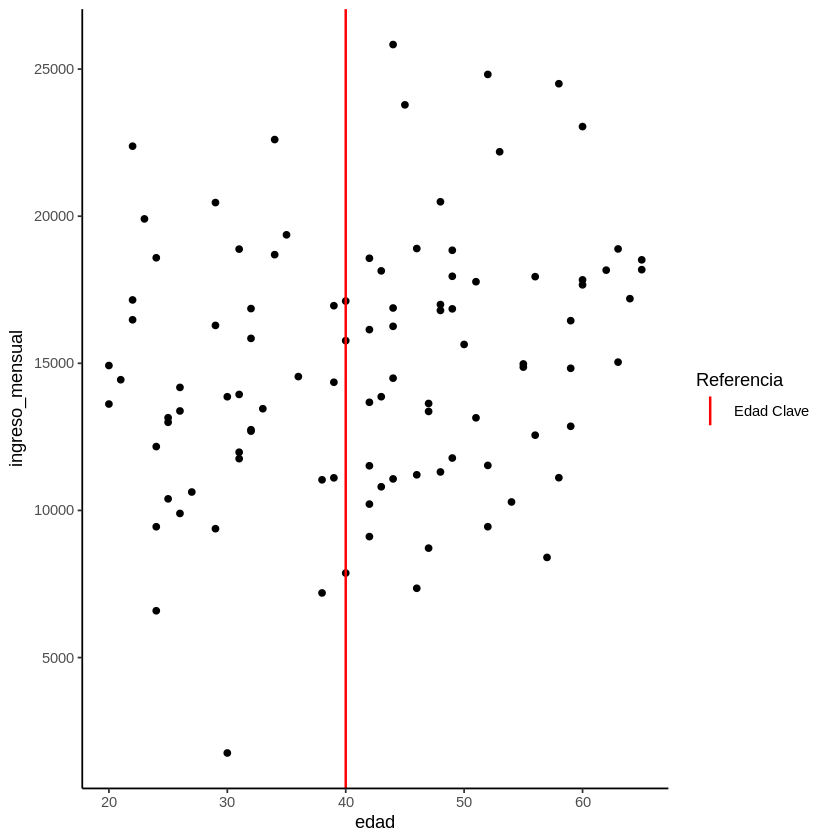

In [32]:
ggplot(datos, aes(x = edad, y = ingreso_mensual)) +
  geom_point() +
  geom_vline(aes(xintercept = 40, color = "Edad Clave"), size = 0.7) +
  scale_color_manual(name = "Referencia", values = c("Edad Clave" = "red")) +
  theme_classic()

**xlim() y ylim() — Límites de ejes**

Controlan el rango de valores visibles en los ejes.

Cuidado: xlim() y ylim() eliminan puntos fuera de esos rangos

Warning message:
“Removed 22 rows containing missing values or values outside the scale range
(`geom_point()`).”


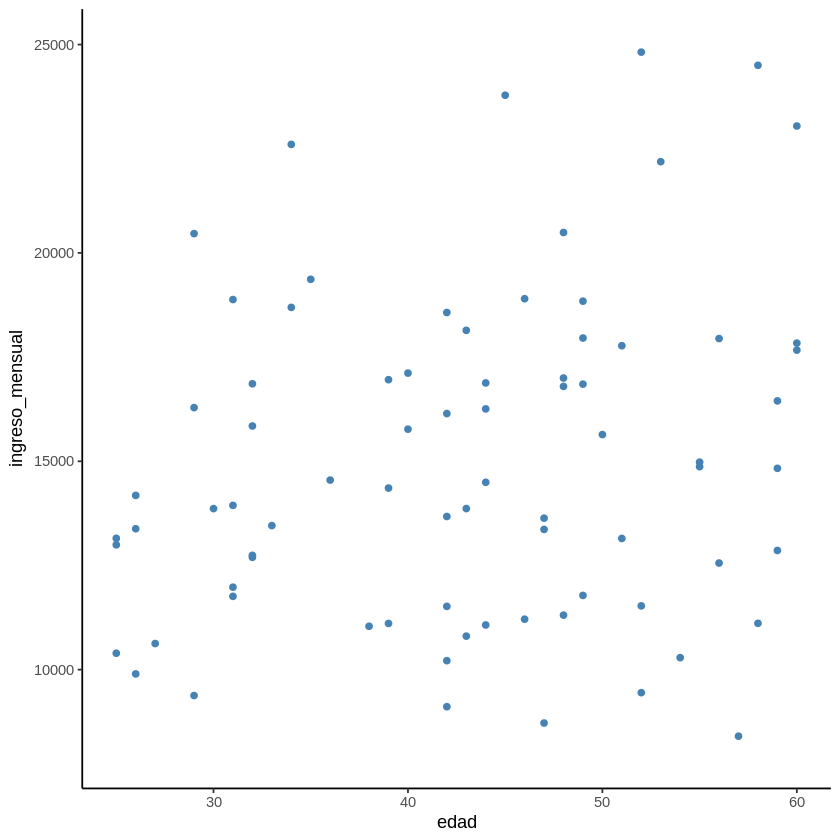

In [33]:
ggplot(datos, aes(x = edad, y = ingreso_mensual)) +
  geom_point(color = "steelblue") +
  xlim(25, 60) +
  ylim(8000, 25000) +
  theme_classic()


Alternativa segura: scale_x_continuous() y scale_y_continuous()

Conservan los puntos invisibles (por si los necesitas para otros cálculos):

Warning message:
“Removed 22 rows containing missing values or values outside the scale range
(`geom_point()`).”


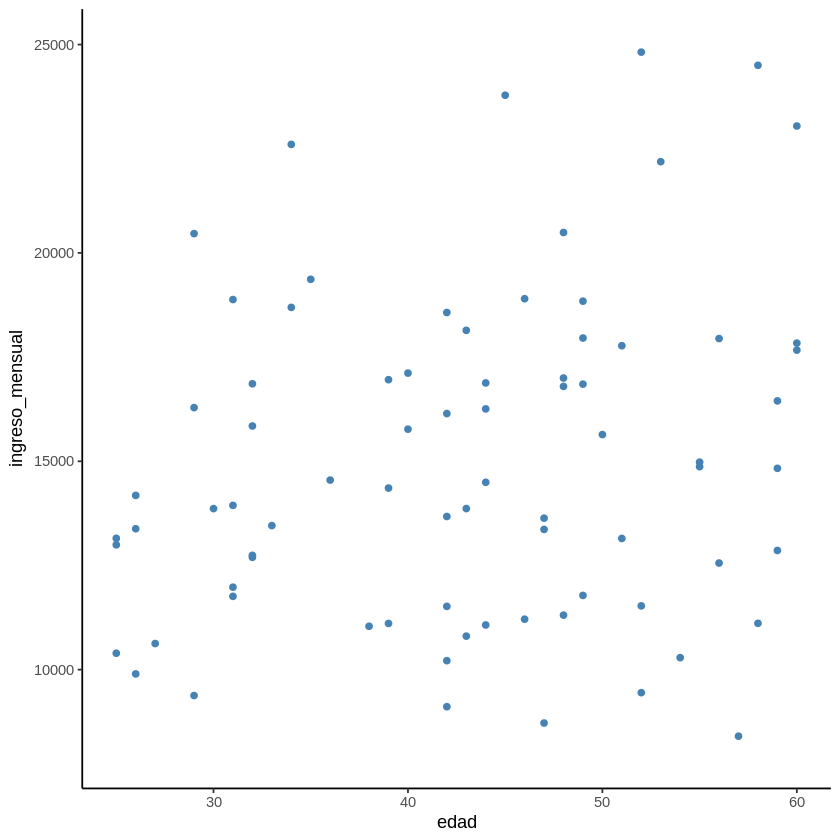

In [34]:
ggplot(datos, aes(x = edad, y = ingreso_mensual)) +
  geom_point(color = "steelblue") +
  scale_x_continuous(limits = c(25, 60)) +
  scale_y_continuous(limits = c(8000, 25000)) +
  theme_classic()